In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

%matplotlib inline

In [3]:
df = pd.read_csv('Wholesale customers data.csv')
df.head(4)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788


In [24]:
df.shape

(440, 8)

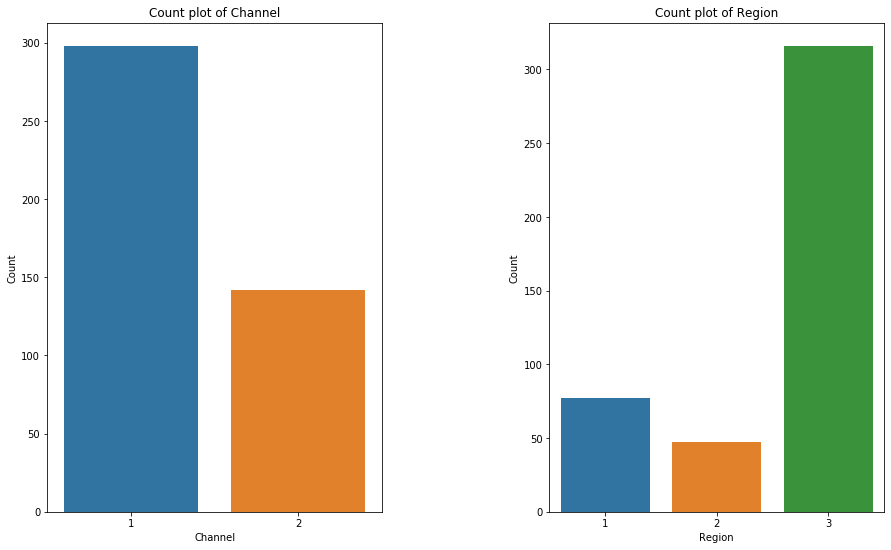

In [13]:
plt.figure(figsize= (15,9))
cols = ['Channel',  'Region']
for i, col in enumerate(cols):
    plt.subplot(1, len(cols),i+1)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.countplot(df[col])
    plt.title('Count plot of {}'.format(col))
    plt.ylabel('Count')
    plt.xlabel(col)
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [15]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [16]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [19]:
X = df.drop(['Channel', 'Region'], axis='columns')

 # Clustering with KMeans

In [29]:
n_clusters = range(2, 10)
clusters_inertia = []
sil_scores = []
for n in n_clusters:
    km = KMeans(init = 'k-means++', n_clusters = n)
    km.fit(X)
    clusters_inertia.append(km.inertia_)
    silhouette_avg = silhouette_score(X, km.labels_)
    sil_scores.append(silhouette_avg)

Text(0.5, 1.0, 'Elbow Method')

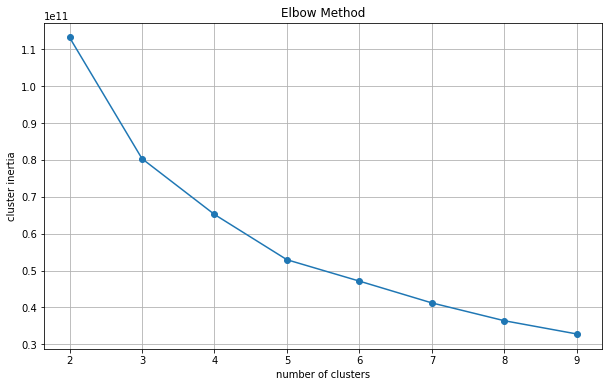

In [30]:
plt.figure(figsize= (10,6))

plt.plot(n_clusters, clusters_inertia, marker= 'o')
plt.ylabel('cluster inertia')
plt.xlabel('number of clusters')
plt.grid()
plt.title('Elbow Method')

Text(0.5, 1.0, 'Silhouette Method')

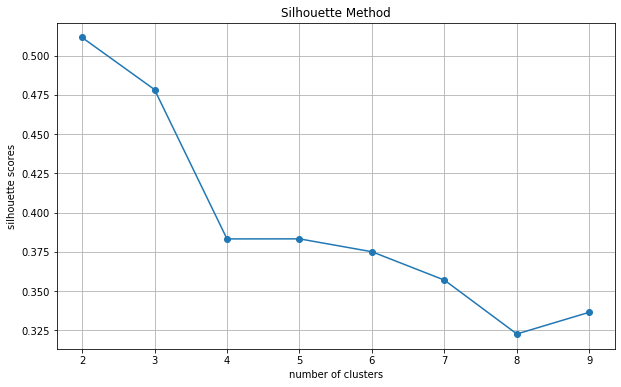

In [31]:
plt.figure(figsize= (10,6))

plt.plot(n_clusters, sil_scores, marker= 'o')
plt.ylabel('silhouette scores')
plt.xlabel('number of clusters')
plt.grid()
plt.title('Silhouette Method')

In [32]:
km = KMeans(init = 'k-means++', n_clusters = 2)
y_pred = km.fit_predict(X)

In [33]:
df['clusters'] = y_pred

In [34]:
km_cluster_sizes =df.groupby('clusters').size().to_frame()
km_cluster_sizes.columns = ['KMsize']
km_cluster_sizes

,KMsize
clusters,
0,375
1,65


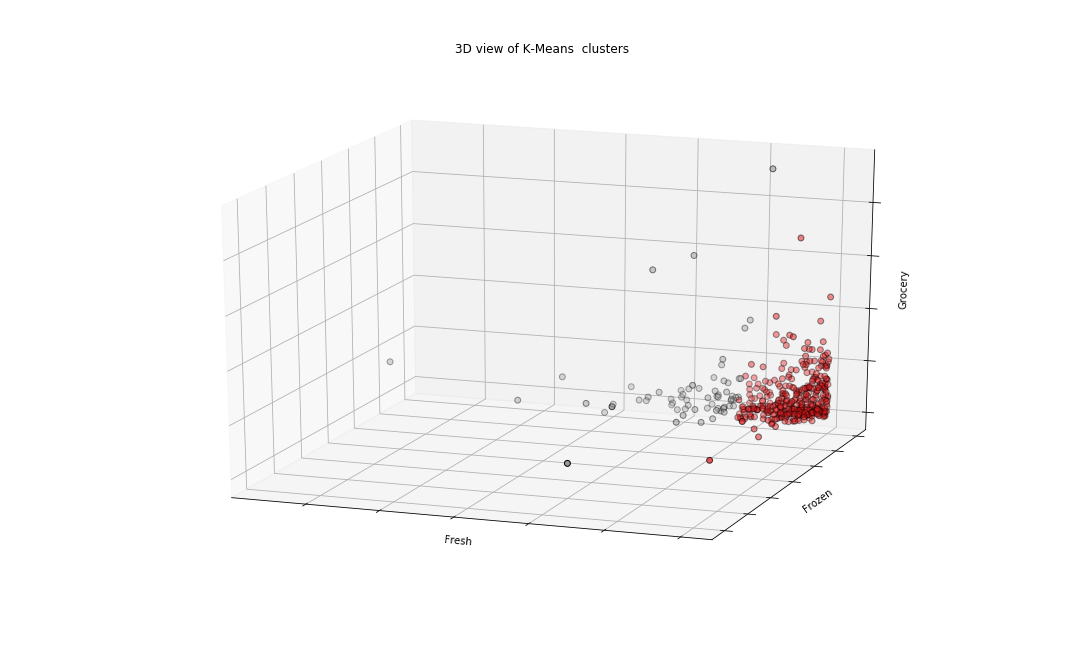

In [44]:
fig = plt.figure(figsize=(15,9))

ax = Axes3D(fig, rect = [0, 0, 0.99, 1], elev = 20, azim = 110)
ax.scatter(df['Fresh'],
          df['Frozen'],
          df['Grocery'], c = df['clusters'], s=35, edgecolor = 'k', cmap= plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Fresh')
ax.set_ylabel('Frozen')
ax.set_zlabel('Grocery')
ax.set_title('3D view of K-Means  clusters')
ax.dist = 12


plt.show()

In [48]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''
    This function returns trace object for Plotly
    '''
    return go.Scatter3d(
        x = db[db['clusters']==n]['Fresh'],
        y = db[db['clusters']==n]['Frozen'],
        z = db[db['clusters']==n]['Grocery'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 2
        )
     )

trace0 = tracer(df, 0, 'Cluster 0')
trace1 = tracer(df, 1, 'Cluster 1')


data = [trace0, trace1]

layout = go.Layout(
    title = 'Clusters by K-Means',
    scene = dict(
            xaxis = dict(title = 'Fresh'),
            yaxis = dict(title = 'Frozen'),
            zaxis = dict(title = 'Grocery')
        )
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [84]:
eps_values = np.arange(20, 25, 0.25)
min_samples = np.arange(10, 12)
DBSCAN_params = list(product(eps_values, min_samples))

In [85]:
n_clusters = []
sil_score = []

for param in DBSCAN_params:
    DBS_clust = DBSCAN(eps = param[0], min_samples=param[1])
    DBS_clust.fit(X)
    n_clusters.append(len(np.unique(DBS_clust.labels_)))
    s_score = silhouette_score(X, DBS_clust.labels_)
    sil_score.append(s_score)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples']) 